# Data Analysis on South Korea's Total Fertility Rate (TFR)

## 1. Population Pyramid

### In year 2008,

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Retrieving male population dataset
df_male = pd.read_excel('Total Population in 2008 All Age Range.xlsx', skiprows=3, index_col='Province', usecols='B,E:Y', nrows=1)
df_male

,0~4 years old,5~9 years old,10~14 years old,15~19 years old,20~24 years old,25~29 years old,30~34 years old,35~39 years old,40~44 years old,45~49 years old,...,55~59 years old,60~64 years old,65~69 years old,70~74 years old,75~79 years old,80~84 years old,85~89 years old,90~94 years old,95~99 years old,above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,"1,186,823","1,488,956","1,817,743","1,794,864","1,660,198","2,079,539","2,017,073","2,335,586","2,139,181","2,251,524",...,"1,240,891","970,489","880,640","593,866","310,391","146,792","64,705","14,557","2,747",245


In [6]:
# Renaming column names
headerNames = ['0~4', '5~9', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85~89', '90~94', '95~99', 'Above 100']
df_male.columns = headerNames
df_male

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,"1,186,823","1,488,956","1,817,743","1,794,864","1,660,198","2,079,539","2,017,073","2,335,586","2,139,181","2,251,524",...,"1,240,891","970,489","880,640","593,866","310,391","146,792","64,705","14,557","2,747",245


In [7]:
 # Converting str -> int
df_male_temp1 = df_male.iloc[0:1, 0:-1]
df_male_temp1.iloc[0] = df_male_temp1.iloc[0].str.replace(',', '').astype(int)

In [8]:
# Combining two data frames
df_male_temp2 = df_male.iloc[0:1, -1:]
df_male = pd.concat([df_male_temp1,df_male_temp2], axis=1, join='inner')

In [9]:
df_male

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,1186823,1488956,1817743,1794864,1660198,2079539,2017073,2335586,2139181,2251524,...,1240891,970489,880640,593866,310391,146792,64705,14557,2747,245


In [10]:
# Retrieving female population dataset
df_female = pd.read_excel('Total Population in 2008 All Age Range.xlsx', skiprows=3, index_col='Province', usecols='B,AB:AV', nrows=1)
df_female

,0~4 years old.1,5~9 years old.1,10~14 years old.1,15~19 years old.1,20~24 years old.1,25~29 years old.1,30~34 years old.1,35~39 years old.1,40~44 years old.1,45~49 years old.1,...,55~59 years old.1,60~64 years old.1,65~69 years old.1,70~74 years old.1,75~79 years old.1,80~84 years old.1,85~89 years old.1,90~94 years old.1,95~99 years old.1,above 100.1
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,"1,108,721","1,362,763","1,627,641","1,590,015","1,531,729","1,981,664","1,938,810","2,247,891","2,058,633","2,181,163",...,"1,256,281","1,037,402","1,043,041","824,834","564,899","326,410","170,349","53,371","11,744","2,034"


In [11]:
# To have the same column names
df_female.columns = df_male.columns

In [12]:
# Converting str -> int
df_female.iloc[0] = df_female.iloc[0].str.replace(',', '').astype(int)
df_female

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,1108721,1362763,1627641,1590015,1531729,1981664,1938810,2247891,2058633,2181163,...,1256281,1037402,1043041,824834,564899,326410,170349,53371,11744,2034


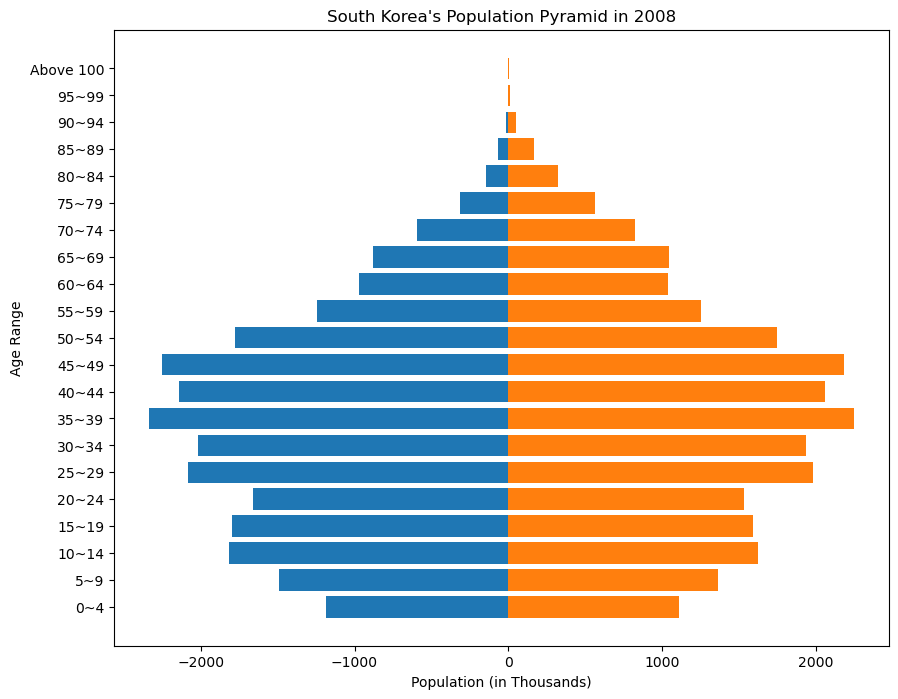

In [13]:
# Creating population pyramid
plt.figure(figsize=(10, 8))
plt.barh(df_male.columns, -df_male.iloc[0] // 1000)
plt.barh(df_female.columns, df_female.iloc[0] // 1000)
plt.title("South Korea's Population Pyramid in 2008")
plt.xlabel("Population (in Thousands)")
plt.ylabel("Age Range")
plt.savefig("South Korea's Population Pyramid in 2008.png", dpi=100)
plt.show()

### In year 2024,

In [15]:
# Following the same step 
file_name = 'Total Population in 2024 All Age Range.xlsx'
df_male = pd.read_excel(file_name, skiprows=3, index_col='Province', usecols='B,E:Y', nrows=1)
headerNames = ['0~4', '5~9', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85~89', '90~94', '95~99', 'Above 100']
df_male.columns = headerNames
df_male.iloc[0] = df_male.iloc[0].str.replace(',', '').astype(int)
df_male

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,657672,980329,1195532,1184636,1402427,1743714,1821544,1622063,2013109,1943242,...,2141661,2096115,1724857,1101643,787398,527736,243677,63555,10688,1582


In [16]:
df_female = pd.read_excel(file_name, skiprows=3, index_col='Province', usecols='B,AB:AV', nrows=1)
df_female.columns = df_male.columns
df_female.iloc[0] = df_female.iloc[0].str.replace(',', '').astype(int)
df_female

,0~4,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,...,55~59,60~64,65~69,70~74,75~79,80~84,85~89,90~94,95~99,Above 100
Province,,,,,,,,,,,,,,,,,,,,,
Nationwide,626995,932105,1133396,1116047,1298168,1591913,1639684,1520907,1938266,1887373,...,2125336,2117467,1819625,1242430,972105,814530,506059,198271,47129,7155


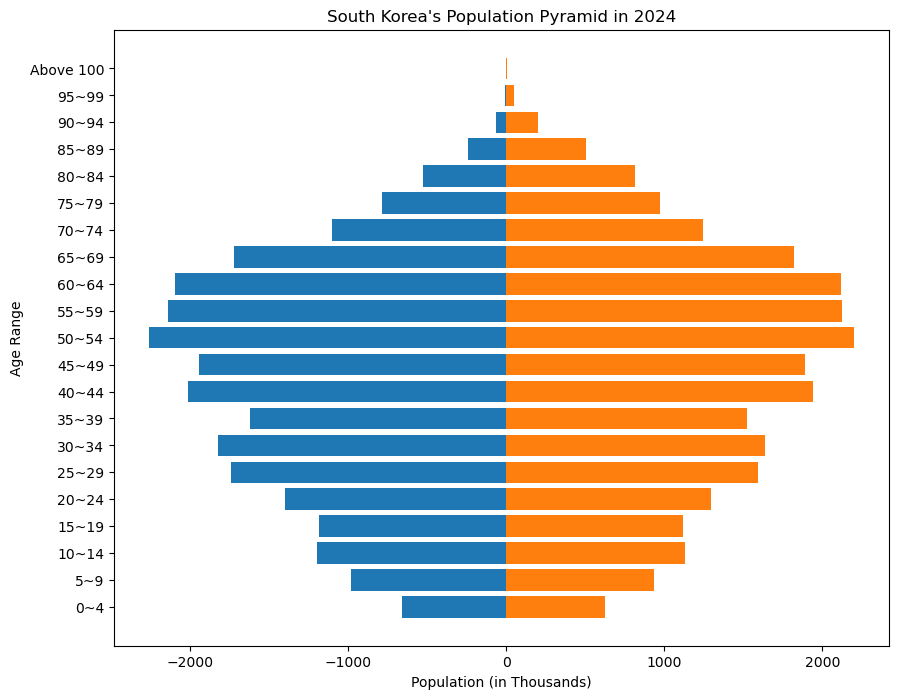

In [17]:
plt.figure(figsize=(10, 8))
plt.barh(df_male.columns, -df_male.iloc[0] // 1000)
plt.barh(df_female.columns, df_female.iloc[0] // 1000)
plt.title("South Korea's Population Pyramid in 2024")
plt.xlabel("Population (in Thousands)")
plt.ylabel("Age Range")
plt.savefig("South Korea's Population Pyramid in 2024.png", dpi=100)
plt.show()